In [1]:
if(!require(jsonlite)){
    install.packages("jsonlite", repos="https://cran.rstudio.com/")
    library(jsonlite)
}
if(!require(forecast)){
    install.packages("forecast")
    library(forecast)
}
if(!require(xts)){
    install.packages("xts")
    library(xts)
}

Loading required package: jsonlite
Loading required package: forecast
Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
json_file <- 'https://datahub.io/core/bond-yields-uk-10y/datapackage.json'
json_data <- fromJSON(paste(readLines(json_file), collapse=""))

required_dataset <- 'quarterly_csv.csv'

for(i in 1:length(json_data$resources$datahub$type)){
  if(json_data$resources$datahub$type[i]=='derived/csv' ){
    
    path_to_file = json_data$resources$path[i]
    file_name = tail(unlist(strsplit(path_to_file, '/')), 1)

    if(file_name == required_dataset){
        print(file_name)
        data <- read.csv(url(path_to_file))
    }
  }
}
head(data)

Warning message in readLines(json_file):
“incomplete final line found on 'https://datahub.io/core/bond-yields-uk-10y/datapackage.json'”

[1] "quarterly_csv.csv"


Date,Rate
1984-03-31,10.9817
1984-06-30,11.5721
1984-09-30,11.9866
1984-12-31,11.1937
1985-03-31,11.6959
1985-06-30,11.3342


### TS

In [3]:
data.ts = ts(data$Rate, start = c(1984, 03), frequency = 4)

In [4]:
frequency(data.ts)

[1] 4

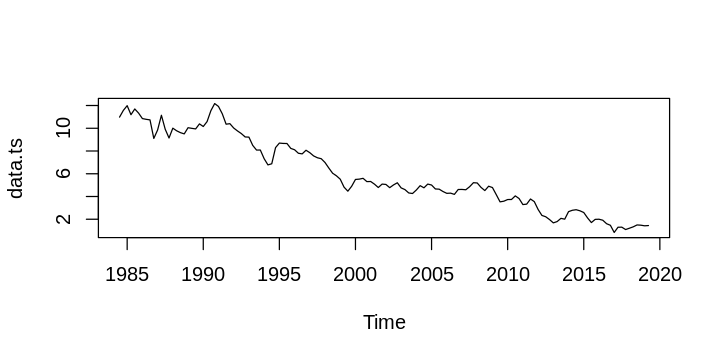

In [5]:
library(repr)
options(repr.plot.width=6, repr.plot.height=3)
plot(data.ts)

### XTS

In [6]:
data.ts = xts(x = data$Rate, order.by = as.POSIXct(data$Date))

In [7]:
periodicity(data.ts)

Quarterly periodicity from 1984-03-31 to 2018-12-31 

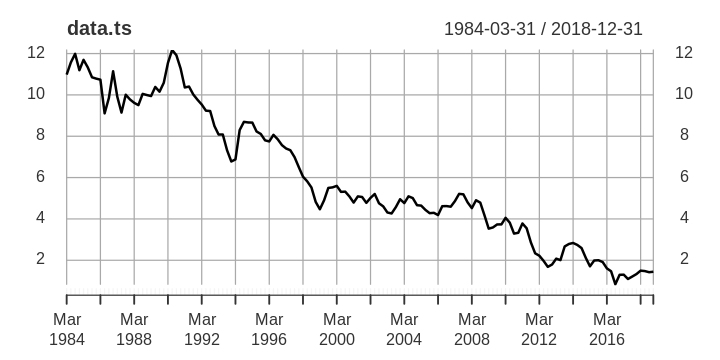

In [8]:
library(repr)
options(repr.plot.width=6, repr.plot.height=3)
plot(data.ts)